(lec7_live_complete)=
# [complete] Lecture 7 live coding

**2025-02-25**

---

## Law of Total Expectation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [2]:
# Set random seed for reproducibility
rng = np.random.RandomState(42)
n_samples = 10000

Suppose we're looking at average coffee prices globally over two types of coffee beans: Arabica and Robusta.

$$
X = \begin{cases}
1 & \text{if coffee is Arabica} \\
0 & \text{if coffee is Robusta}
\end{cases}
$$

In [5]:
# # generate a random variable X with 80% arabica and 20% robusta
X = rng.choice([0, 1], size=n_samples, p=[0.2, 0.8])

array([1, 0, 1, 1, 1])

In [4]:
# COMPLETED CELL
# # generate a random variable X with 80% arabica and 20% robusta
# X = rng.choice([1, 0], size=n_samples, p=[0.8, 0.2])

Let $Y$ be the price of coffee in dollars per pound.

Arabica prices are higher, on average:
$$
Y \sim \begin{cases}
\mathcal{N}(4.5, \;0.75^2) & \text{if coffee is Arabica} \\
\mathcal{N}(2.0, \;0.25^2) & \text{if coffee is Robusta}
\end{cases}
$$

In [12]:
# Create Y from two normal distributions
Y = np.where(X == 1,
             # select from this if X == 1
             rng.normal(loc=4.5, scale=0.75, size=n_samples),
             # select if X == 0
            rng.normal(loc=2, scale=0.25, size=n_samples))

Y[:5]

# Create dataframe
coffee_df = pd.DataFrame({
    'is_arabica': X,
    'price $/lb': Y
})

coffee_df.head()

,is_arabica,price $/lb
0,1,3.517227
1,0,2.048971
2,1,4.078259
3,1,4.295241
4,1,5.240613


In [6]:
# COMPLETED CELL
# # Create Y from two normal distributions
# Y = np.where(
#     X == 1,
#     rng.normal(loc=4.5, scale=0.75, size=n_samples),
#     rng.normal(loc=2, scale=0.25, size=n_samples)
# )

# # create dataframe
# coffee_df = pd.DataFrame({
#     'is_arabica': X,
#     'price': Y
# })

:::{note}
The Law of Total Expectation is generally stated as:

$$
E[Y] = E[E[Y|X]]
$$

"The expected value of Y equals the expected value of the conditional expectation of Y given X"

**Idea**: we take the average of conditional means of Y given X over all possible values of X.

For binary X, this expands to:

$$
E[Y] = E[Y|X=1]P(X=1) + E[Y|X=0]P(X=0)
$$

$E[E[Y|X]]$ means we:

1. First compute the conditional means of $Y$ for each value of $X$
2. Then take the weighted average of these conditional means, weighted by how often each $X$ occurs
:::

Let's now verify the Law of Total Expectation with our coffee data:

In [13]:
# compute the simple mean of Y
actual_mean = np.mean(Y)

# compute the conditional means
Y_X1 = Y[X==1].mean()
Y_X0 = Y[X==0].mean()

# mean of a binary variable is equivalent to the probability it is equal to 1
# P(X=1) = E[X], when X is binary
prob_is_arabica = X.mean()


# calculate the weighted average of conditional means
# E[Y∣ X=1]P(X=1)+ E[Y∣ X=0]P(X=0)
law_of_total_expectation = Y_X1 * prob_is_arabica + Y_X0 * (1 - prob_is_arabica)


print("Actual mean price: ${:.2f}/lb".format(actual_mean))
print("Law of total expectation: ${:.2f}/lb".format(law_of_total_expectation))


Actual mean price: $4.02/lb
Law of total expectation: $4.02/lb


In [8]:
# COMPLETED CELL
# # compute the simple mean of Y
# actual_mean = coffee_df['price'].mean()

# # compute the conditional means
# p_arabica = np.mean(coffee_df['is_arabica'])
# mean_price_arabica = coffee_df[coffee_df['is_arabica'] == 1]['price'].mean()
# mean_price_robusta = coffee_df[coffee_df['is_arabica'] == 0]['price'].mean()

# # calculate the weighted average of conditional means
# law_of_total_expectation = (mean_price_arabica * p_arabica + 
#                            mean_price_robusta * (1 - p_arabica))


# print("Actual mean price: ${:.2f}/lb".format(actual_mean))
# print("Law of Total Expectation: ${:.2f}/lb".format(law_of_total_expectation))


We can also visualize the distribution of the prices by species:

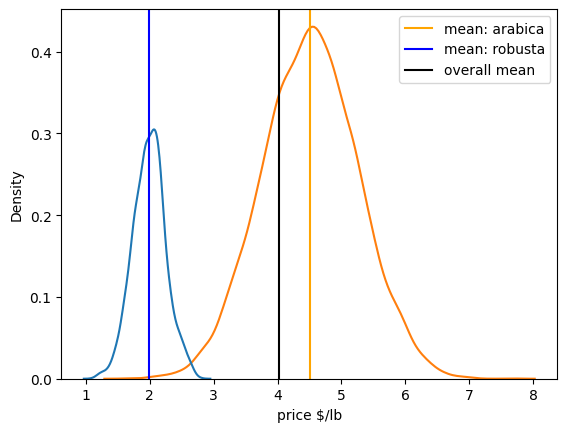

In [19]:
sns.kdeplot(data=coffee_df, x='price $/lb', hue='is_arabica')
plt.axvline(x=Y_X1, color="orange", label="mean: arabica")
plt.axvline(x=Y_X0, color="blue", label="mean: robusta")
plt.axvline(x=actual_mean, color="black", label="overall mean")
plt.legend()

In [9]:
# COMPLETED CELL
# plt.figure(figsize=(10, 6))
# sns.kdeplot(data=coffee_df, x='price', hue='is_arabica')
# plt.axvline(actual_mean, color='black', linestyle='--', 
#             label='Overall mean')
# plt.axvline(mean_price_arabica, color='orange', linestyle='--', 
#             label='Mean price: Arabica')
# plt.axvline(mean_price_robusta, color='blue', linestyle='--', 
#             label='Mean price: Robusta')
# plt.xlabel('Price ($/lb)')
# plt.ylabel('Density')
# plt.title('Distribution of Coffee Prices by Species')
# plt.legend()

:::{note}
Things to notice:    

- The overall mean (black dashed line) must fall between the two conditional means
- It's pulled closer to the Arabica mean because there's more Arabica (80%)
- The area under each curve represents the relative frequency of each type
:::

---

## Keyword argument unpacking

By prefixing a dictionary with `**`, you can unpack the dictionary into keyword arguments.

In [10]:
# COMPLETED CELL
# def add(a, b):
#     return a + b

# d = {'a': 1, 'b': 2}

# add(**d)

The `**` operator can also be used in the function definition:

In [11]:
# COMPLETED CELL
# def key_print(**kwargs):
#     # we see that the type of kwargs is dict
#     print(type(kwargs))
#     print(kwargs)

#     for k, v in kwargs.items():
#         print("key: ", k)
#         print("value: ", v)

# card_ranks = {"J": 11, "Q": 12, "K": 13, "A": 1}
# key_print(**card_ranks)

:::{note}
See the [str.format()](https://docs.python.org/3/library/stdtypes.html#str.format) method as an example of keyword argument unpacking.
:::

In [ ]:
help(str.format)

In [ ]:
# can give keyword args
print("In this game, {card} is rank {value}".format(value=14, card="A"))